import the libraries

In [1]:

import pandas as pd
import numpy as np
import sklearn.metrics as mt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso,LassoCV,ElasticNet,ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

uploading data

In [2]:
pd.set_option('max_columns',100)
pd.set_option('max_rows',900)

pd.set_option('max_colwidth',200)

data = pd.read_csv('/content/drive/MyDrive/datas/CarPrice_Assignment.csv')
datacp=data.copy()

Exploratory Data Analysis

In [3]:
datacp.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
datacp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

observing missing data

In [5]:
datacp.isnull().sum()  

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [6]:
datacp.nunique()

car_ID              205
symboling             6
CarName             147
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            7
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [7]:
datacp['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

Carname has 147 different entity. I'll check it. And try to find a way to reduce the variance.

In [8]:
# There are some spelling inconsistencies in the values
# Also there are multiple models of same car maker, therefore combining them
datacp.CarName = datacp.CarName.apply(lambda x: x.split(' ')[0])
def replace_name(old,new):
    datacp.CarName.replace(old,new, inplace = True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
datacp.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

. Car ID column is repetition of the index. So I'll drop it.

In [9]:
datacp= datacp.drop(['car_ID'], axis=1)

(array([83., 45., 35., 18.,  6.,  3.,  5.,  7.,  2.,  1.]),
 array([ 5118. ,  9146.2, 13174.4, 17202.6, 21230.8, 25259. , 29287.2,
        33315.4, 37343.6, 41371.8, 45400. ]),
 <a list of 10 Patch objects>)

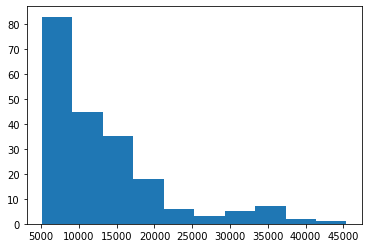

In [10]:
# Visualizing price distribution of different car names
plt.hist(datacp.price)

In [11]:
numerical= datacp.select_dtypes('number').columns

categorical = datacp.select_dtypes('object').columns

print(f'Numerical Columns:  {datacp[numerical].columns}')
print('\n')
print(f'Categorical Columns: {datacp[categorical].columns}')

Numerical Columns:  Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


Categorical Columns: Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


Visualizing the categorical features

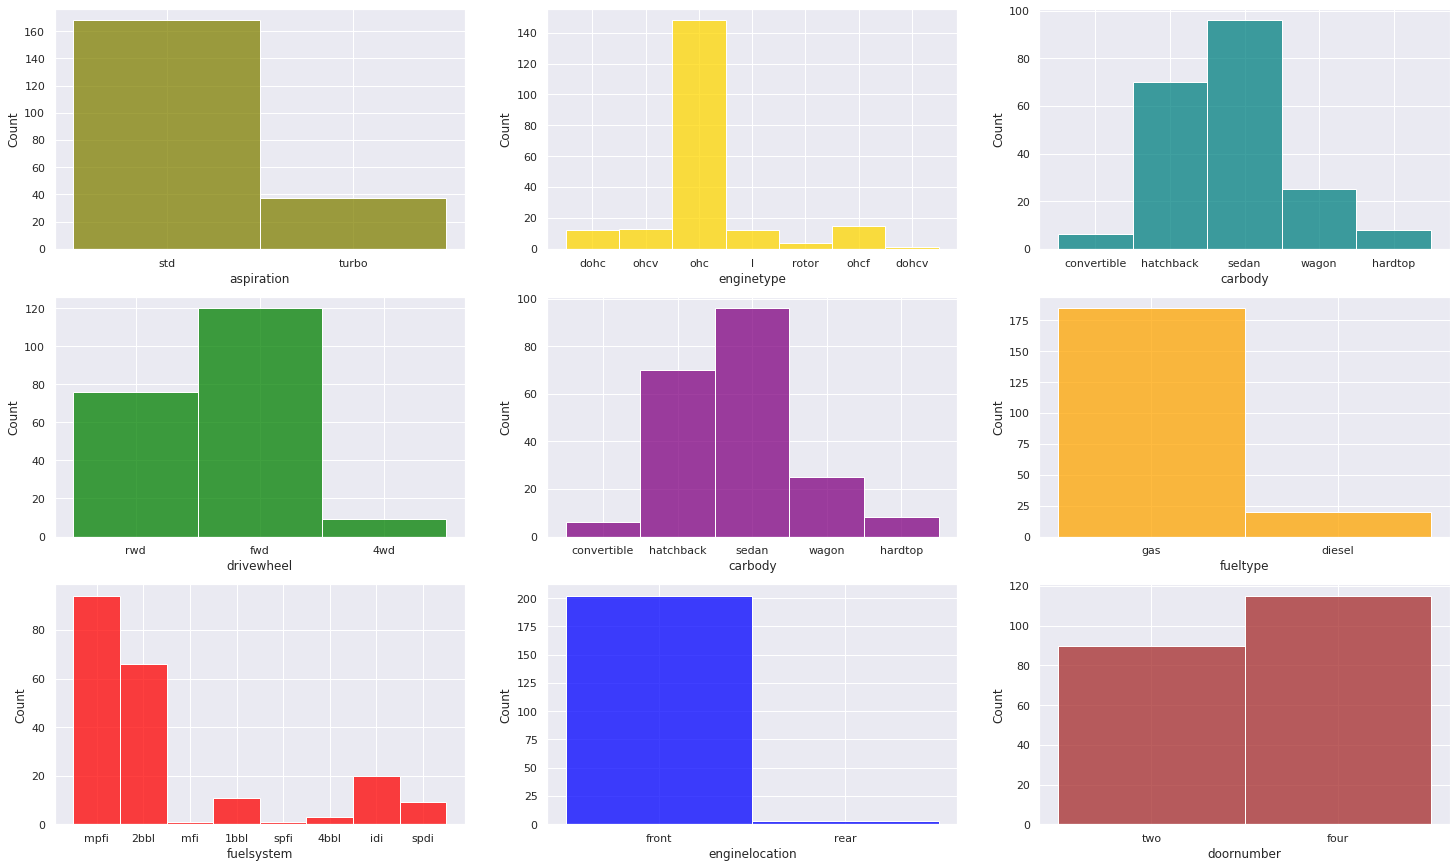

In [12]:

sns.set(style = 'darkgrid')
fig, axs = plt.subplots(3,3, figsize = (25,15))


sns.histplot(data=datacp, x="aspiration", color="olive", ax=axs[0, 0])
sns.histplot(data=datacp, x="enginetype", color="gold", ax=axs[0, 1])
sns.histplot(data=datacp, x="carbody", color="teal", ax=axs[0, 2])
sns.histplot(data=datacp, x="drivewheel", color="green", ax=axs[1, 0])
sns.histplot(data=datacp, x="carbody", color="purple", ax=axs[1, 1])
sns.histplot(data=datacp, x="fueltype", color="orange", ax=axs[1, 2])
sns.histplot(data=datacp, x="fuelsystem", color="red", ax=axs[2, 0])
sns.histplot(data=datacp, x="enginelocation", color="blue", ax=axs[2, 1])
sns.histplot(data=datacp, x="doornumber", color="brown", ax=axs[2, 2])

Let's observe the correlation among the numerical features
And also observe the correlation with the target variable

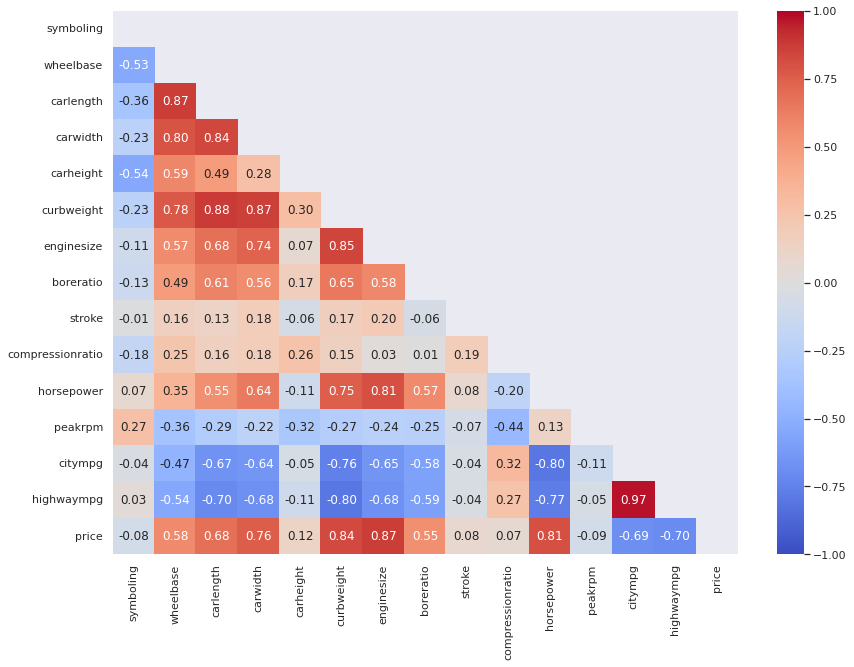

In [13]:
numerical1= datacp.select_dtypes('number').columns


matrix = np.triu(datacp[numerical1].corr())
fig, ax = plt.subplots(figsize=(14,10)) 
sns.heatmap (datacp[numerical1].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

For linear models we can leave a few of them to avoid multicollinearity problems

In [14]:
# Function to determine most correlated features
def correlation(data, threshold=None):
    # Set of all names of correlated columns
    col_corr = set()
    corr_mat = data.corr()
    for i in range(len(corr_mat.columns)):
        for j in range(i):
            if (abs(corr_mat.iloc[i,j]) > threshold):
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

In [15]:
correlated_features = correlation(data = datacp, threshold = 0.85)
set(correlated_features)

{'carlength', 'curbweight', 'enginesize', 'highwaympg', 'price'}

In [16]:
correlated_features.remove('price')

In [17]:
datacp.drop(labels= correlated_features, axis=1, inplace=True)

In [18]:
datacp.head(5)

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carwidth,carheight,enginetype,cylindernumber,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,64.1,48.8,dohc,four,mpfi,3.47,2.68,9.0,111,5000,21,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,64.1,48.8,dohc,four,mpfi,3.47,2.68,9.0,111,5000,21,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,65.5,52.4,ohcv,six,mpfi,2.68,3.47,9.0,154,5000,19,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,66.2,54.3,ohc,four,mpfi,3.19,3.40,10.0,102,5500,24,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,66.4,54.3,ohc,five,mpfi,3.19,3.40,8.0,115,5500,18,17450.0


In [19]:
le= preprocessing.LabelEncoder()

In [20]:
categorical

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [21]:
categorical2=categorical.drop('CarName')
categorical2

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')

In [22]:
datacp['CarName'] = le.fit_transform(datacp['CarName'])

In [23]:
datacp = pd.get_dummies(datacp, columns=categorical2, drop_first=True)
datacp.head()

,symboling,CarName,wheelbase,carwidth,carheight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,88.6,64.1,48.8,3.47,2.68,9.0,111,5000,21,13495.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,3,1,88.6,64.1,48.8,3.47,2.68,9.0,111,5000,21,16500.0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,1,94.5,65.5,52.4,2.68,3.47,9.0,154,5000,19,16500.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,2,2,99.8,66.2,54.3,3.19,3.40,10.0,102,5500,24,13950.0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,2,2,99.4,66.4,54.3,3.19,3.40,8.0,115,5500,18,17450.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [24]:
# Scaling the data
scale = StandardScaler()

we have eliminated these columns due to multicollinearity problems

In [25]:
numerical=numerical.drop(labels=['carlength', 'curbweight', 'enginesize', 'highwaympg'])
print(numerical)

Index(['symboling', 'wheelbase', 'carwidth', 'carheight', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'price'],
      dtype='object')


In [26]:

datacp[numerical] = scale.fit_transform(datacp[numerical])

In [27]:
datacp.head()

,symboling,CarName,wheelbase,carwidth,carheight,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,price,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1.743470,1,-1.690772,-0.844782,-2.020417,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,0.027391,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1.743470,1,-1.690772,-0.844782,-2.020417,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,0.404461,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0.133509,1,-0.708596,-0.190566,-0.543527,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,0.404461,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.938490,2,0.173698,0.136542,0.235942,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,0.084485,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.938490,2,0.107110,0.230001,0.235942,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,0.523668,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
X= datacp.drop('price', axis=1)
y= datacp['price']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Model Selection

In [30]:
models = [LinearRegression(),Ridge(),Lasso(),ElasticNet(),DecisionTreeRegressor(random_state=0),
          BaggingRegressor(random_state=0),RandomForestRegressor(random_state=0),SVR()]

In [31]:
def models_predict(model):
  model.fit(X_train,y_train)
  predict = model.predict(X_test)
  r2 = mt.r2_score(y_test,predict)
  rmse = mt.mean_squared_error(y_test,predict,squared=False)
  return [r2,rmse]

In [32]:
name = ['LinearRegression','Ridge','Lasso','ElasticNet','DecisionTreeRegressor',
          'BaggingRegressor','RandomForestRegressor','SVR']

In [33]:
result = []
for i in models:
  result.append(models_predict(i))

In [34]:
df = pd.DataFrame(name, columns=['model_name'])
df2 = pd.DataFrame(result, columns=['r2','rmse'])
df = df.join(df2)
print(df)

              model_name        r2      rmse
0       LinearRegression  0.873563  0.371392
1                  Ridge  0.816664  0.447218
2                  Lasso  0.018400  1.034814
3             ElasticNet  0.370893  0.828433
4  DecisionTreeRegressor  0.655368  0.613159
5       BaggingRegressor  0.905912  0.320377
6  RandomForestRegressor  0.909113  0.314880
7                    SVR  0.753575  0.518487


In [35]:
rfr_model = RandomForestRegressor(random_state=0,max_depth=7,n_estimators=36)

In [44]:
parameters = {'max_depth':range(0,50),'n_estimators':range(0,50)}

In [45]:
grid = GridSearchCV(estimator=rfr_model,param_grid=parameters,cv=10)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'max_depth': 7, 'n_estimators': 36}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
990 fits failed out of a total of 25000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
500 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 392, in fit
    self._validate_estimator()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_base.py", line 140, in _validate_estimator
    self.n_estimators
ValueError: n_estimators must be greater than zero, got 0.

In [36]:
rfr_model.fit(X_train,y_train)
rfr_predict = rfr_model.predict(X_test)

In [37]:
rfr_r2 = mt.r2_score(y_test,rfr_predict)
print(rfr_r2)

0.9108326335192918


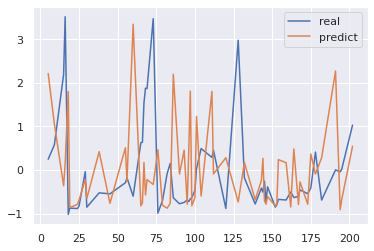

In [38]:
y_test=y_test.sort_index()
grafik=pd.DataFrame({'real':y_test,'predict':rfr_predict})
grafik.plot(kind='line')
plt.show()